# ASSUMPTIONS OF LINEAR REGRESSION

Linear regression makes several assumptions about the data and the relationship between the independent and dependent variables. These assumptions are important to ensure that the results and predictions of the model are accurate and reliable. The main assumptions of linear regression are:


* Linearity: The relationship between the independent and dependent variables should be linear. This means that the change in the dependent variable is proportional to the change in the independent variable. A scatter plot of the data should show a roughly straight-line relationship between the variables.


* Independence: The observations should be independent of each other. This means that the value of the dependent variable for one observation should not be influenced by the value of the dependent variable for another observation.


* Homoscedasticity: The variance of the residuals (the difference between the predicted and actual values of the dependent variable) should be constant across all values of the independent variable. This means that the spread of the residuals should be roughly the same throughout the range of the independent variable.


* Normality: The residuals should be normally distributed. This means that the distribution of the residuals should be symmetrical and bell-shaped.


* No multicollinearity: The independent variables should not be highly correlated with each other. Multicollinearity can make it difficult to interpret the coefficients of the model and can reduce the predictive power of the model.


If any of these assumptions are violated, it can affect the accuracy of the model and the reliability of its predictions. Therefore, it is important to check these assumptions before using linear regression and to take corrective measures if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #supress warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [3]:
x = df.drop(['target'],axis=1)
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Linear Regression using Statsmodels

In [6]:
import statsmodels.api as sm

In [7]:
X_train = sm.add_constant(X_train)

In [8]:
lm = sm.OLS(y_train,X_train).fit()

In [9]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1003.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.65e-92
Time:                        09:17:05   Log-Likelihood:                -616.00
No. Observations:                 140   AIC:                             1240.
Df Residuals:                     136   BIC:                             1252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7721      1.705      0.453      0.6

# Linear Regression Using  Scikit Learn

In [10]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [11]:
x = df.drop(['target'],axis=1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

# Assumptions of Linear Regression:- 

## 1) Linear Relationship between all input variables and output variable.

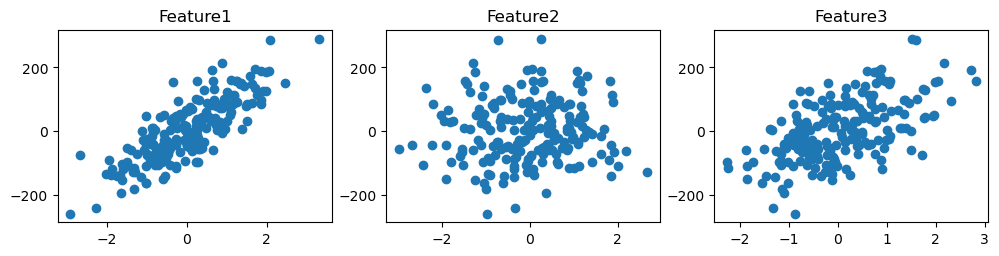

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

## 2) Multicollinearity :- There is no correlation between any input variable. All the input variables are independent.



* First Method

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


* Second Method

In [16]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,feature1,1.01
1,feature2,1.01
2,feature3,1.01


Another technique

<AxesSubplot:>

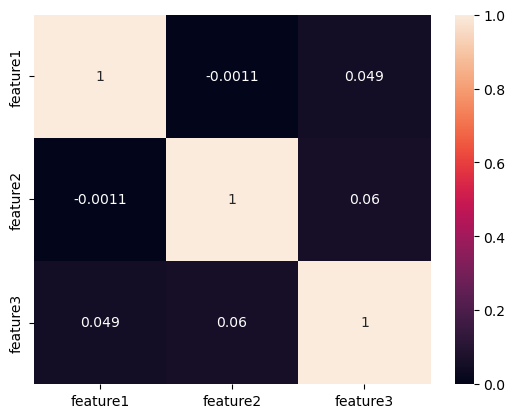

In [17]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### Note:- 
### * Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some choose a more conservative threshold of 5 or even 2.5. 
### * If many features have multicollinearity then we can drop them but one by one not drop all features at same time.


# 3) Normality of residuals / Residual analysis of train data

* When you plot your error/residuals it should be normally distributed


* Mean should be close to zero


* More values are closer to zero and some values are far away from zero


In [18]:
# How to find residuals of data

y_pred = model.predict(X_test)
residual = y_test - y_pred

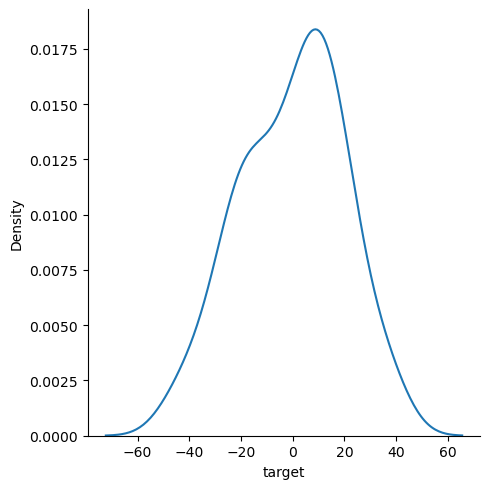

In [19]:
sns.displot(residual,kind='kde')

Text(0.5, 0, 'Errors')

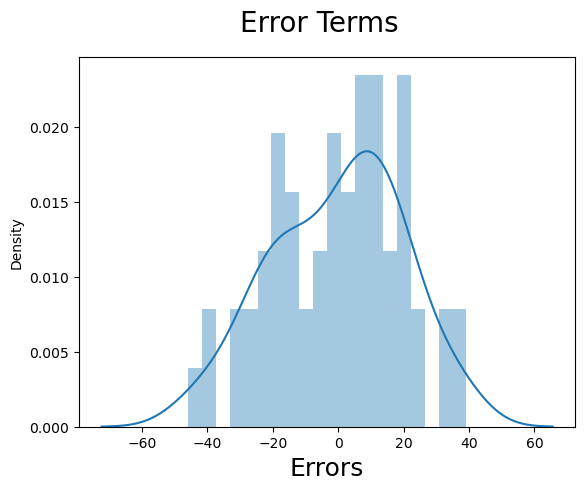

In [29]:
fig=plt.figure()
sns.distplot((residual),bins=20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label

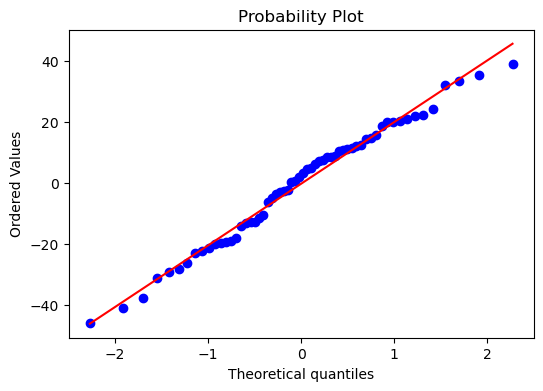

In [21]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

In [22]:
y_train_target = model.predict(X_train)

Text(0, 0.5, 'y_train-y_train_cnt')

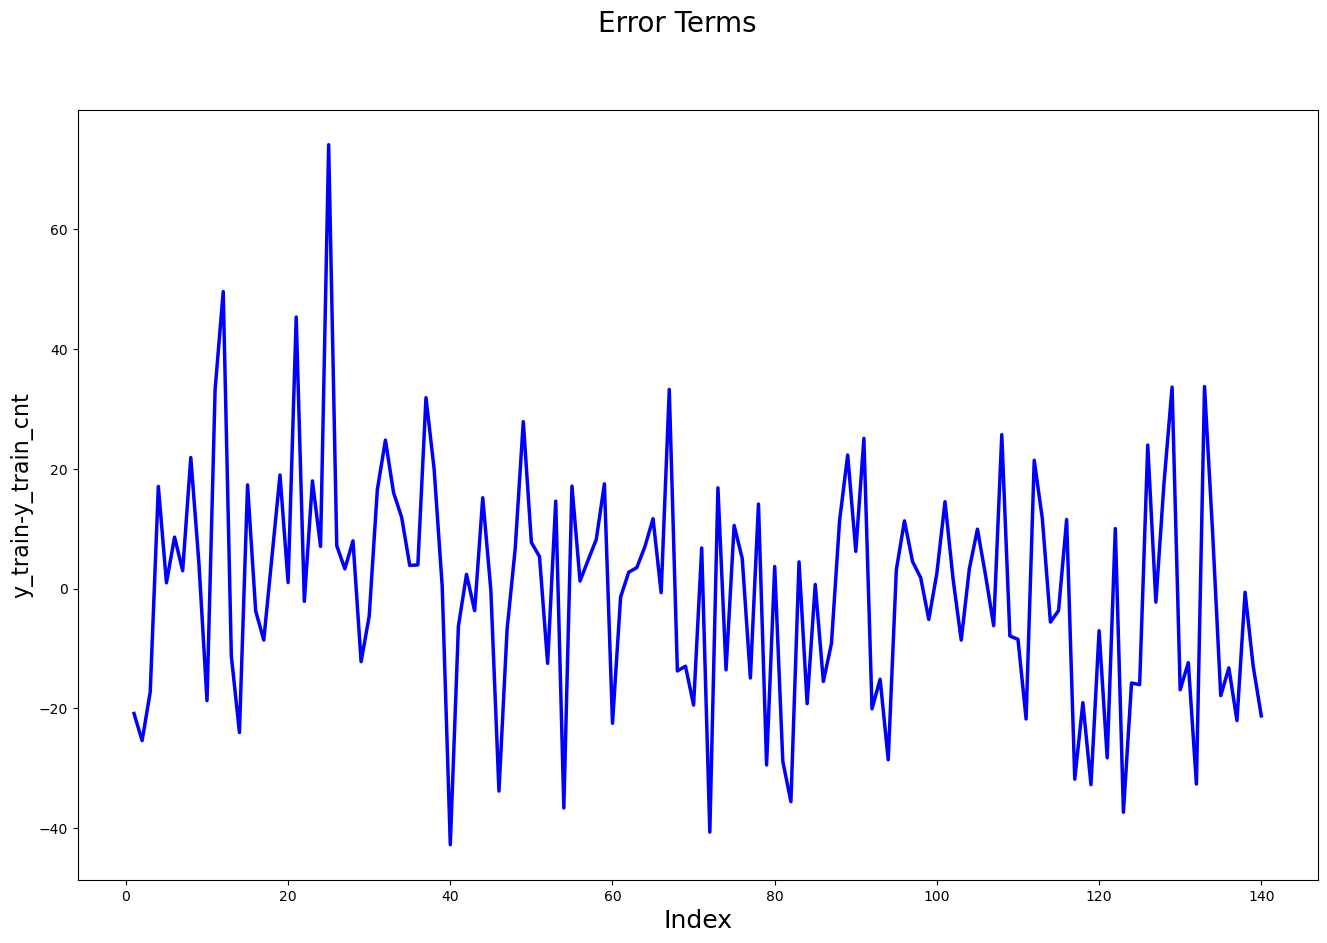

In [23]:
# Error terms
c = [i for i in range(1,len(X_train)+1,1)]
fig = plt.figure(figsize = (16, 10))
plt.plot(c,y_train-y_train_target, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train-y_train_cnt', fontsize=16)                # Y-label

# 4)  Homoscedastasticity

* Homo means same and scedastasticity means spread or scatter. It means having the same scatter. 


* It is related to residual. When you plot your residuals it should having the same spread. If the spread of residuals are not equal it is called Hetroscedastasticity. 


* How to find Homoscedastasticity :- y_prediction is in Y axis and residuals is in X axis

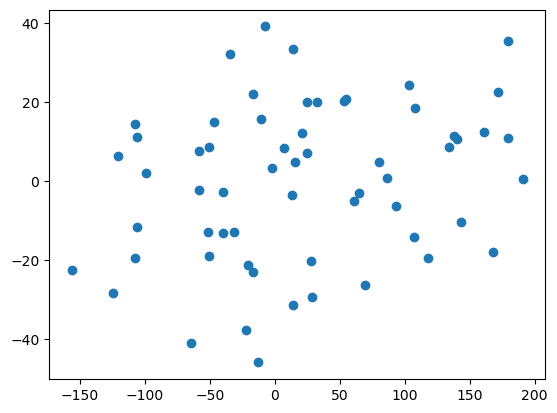

In [24]:
plt.scatter(y_pred,residual)

## 5) No autocorrelation of Errors

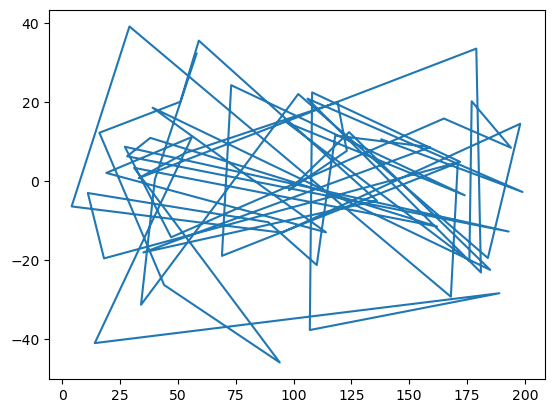

In [25]:
plt.plot(residual)

# Compare your Actual Vs Predicted 

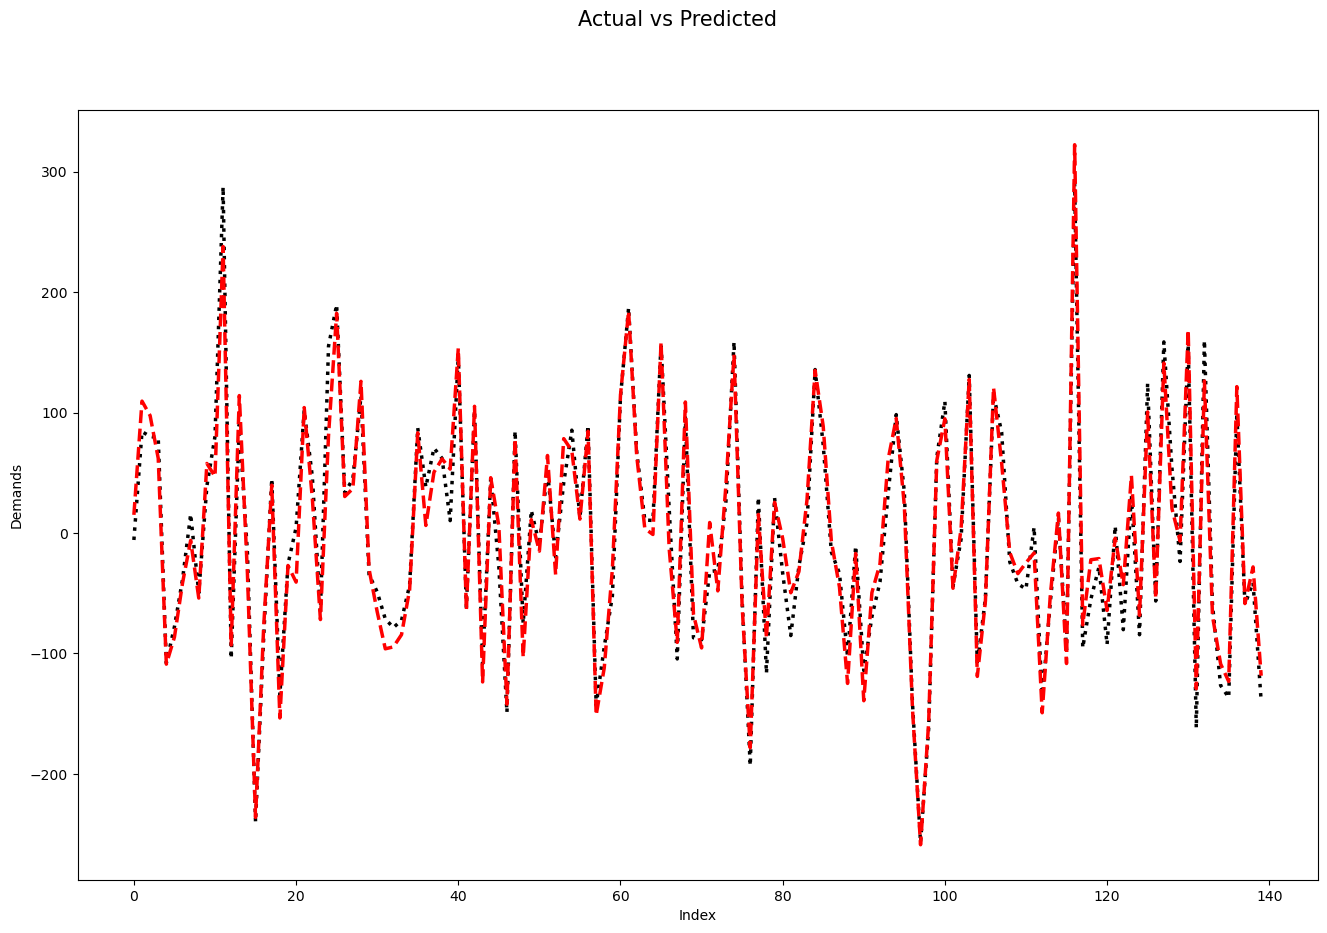

In [26]:
c = [i for i in range(0,len(y_train),1)]
plt.figure(figsize = (16, 10))
plt.plot(c,y_train, color="black", linewidth=2.5, linestyle='dotted')
plt.plot(c,y_train_target, color="red",  linewidth=2.5, linestyle='dashed')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# Model evaluation


Model evaluation in linear regression refers to the process of assessing how well a linear regression model fits the data it was trained on, and how well it is likely to perform on new, unseen data. This is important because the goal of linear regression is to create a model that can make accurate predictions about new data, not just fit the training data well.

There are several methods to evaluate the performance of a linear regression model, including:


* Mean Squared Error (MSE): This measures the average squared difference between the predicted values and the actual values of the dependent variable in the test set. (The lower the MSE value, the better the performance of the model).


* R-squared: This measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. R-squared values range from 0 to 1, with higher values indicating a better fit.


* Root Mean Squared Error (RMSE): This is similar to MSE, but the square root of the average squared difference is taken, which gives a measure of the error in the same units as the dependent variable.


* Adjusted R-squared: This is similar to R-squared, but adjusts for the number of independent variables in the model. It penalizes models with too many variables that may overfit the data.


* Residual plots: This is a visual way to evaluate the goodness-of-fit of the linear regression model. Residuals are the differences between the predicted and actual values, and a good model should have residuals that are randomly distributed around 0, with no pattern or trend.

By using these methods, you can determine the performance of a linear regression model, and make any necessary adjustments or improvements to ensure it accurately predicts new data.

In [31]:
# Make predictions on the testing set

y_pred = model.predict(X_test)

In [37]:
# Evaluate the model using Mean squared error (MSE)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

print('Mean squared error: %.2f' % mse)

Mean squared error: 390.45


In [38]:
# Evaluate the model using  R-squared

r2 = r2_score(y_test, y_pred)
print('R-squared: %.2f' % r2)

R-squared: 0.96


In [39]:
# Evaluate the model using Root Mean Squared Error (RMSE)

np.sqrt(mean_squared_error(y_test, y_pred))

19.759845166828516

In [42]:
# Make predictions and calculate residuals

y_pred = model.predict(x)
resid = y - y_pred

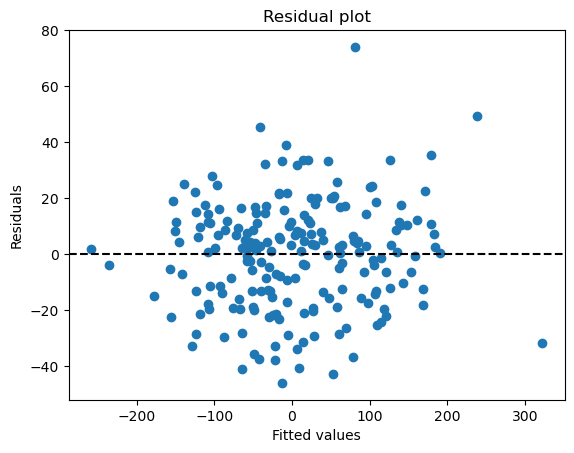

In [43]:
# Create a residual plot
fig, ax = plt.subplots()
ax.scatter(y_pred, resid)
ax.axhline(y=0, color='k', linestyle='--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

## Cross-Validation Score 

In the context of linear regression, the cross-validation score is a measure of how well the linear regression model generalizes to new data. It is calculated by taking the average of the R-squared values obtained in each fold of the cross-validation process. A higher cross-validation score indicates better performance of the model on unseen data.

In [44]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation score: {:.2f}".format(np.mean(cv_scores)))

Cross-validation score: 0.96
